# mcDonalds Case Study

# Importing Libaries

In [104]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

In [9]:
data=pd.read_csv("/Users/apple/Downloads/mcdonalds.csv")

In [11]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


In [13]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [17]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [19]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [21]:
data.shape

(1453, 15)

# Data Preprocessing

In [24]:
data.isna().sum() 
#to find missing values

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [28]:
!pip install missingno

<Axes: >

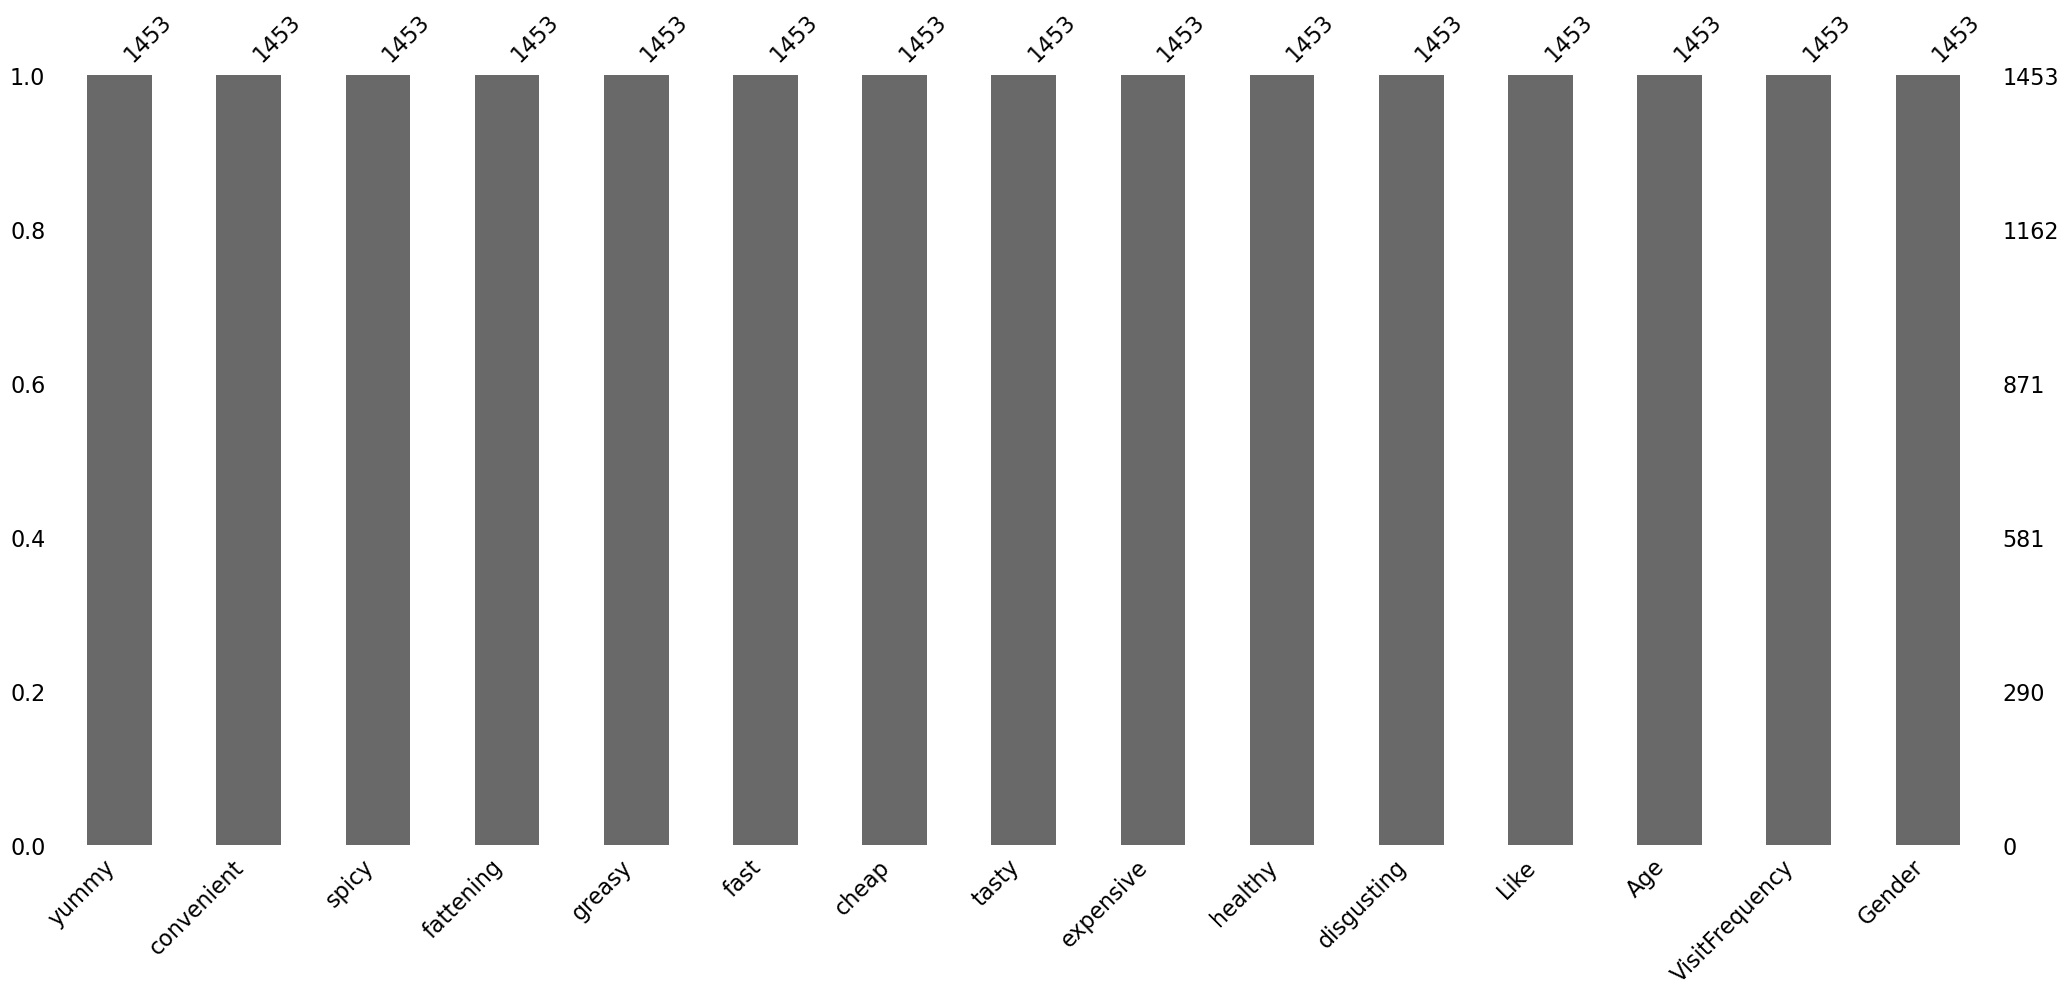

In [32]:
# to fill the missing no
import missingno as msn
msn.bar(data)

In [34]:
data['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

# Exploratory Data Analysis

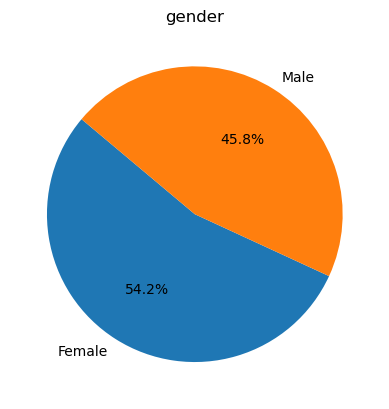

In [41]:
#Uni-variate Analysis
# my traget value is (y) is deposit (categorical method)
sizes= data['Gender'].value_counts()
labels=sizes.index
size=sizes.values
plt.pie(size,labels=labels,autopct="%1.1f%%",startangle=140)
plt.title("gender")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

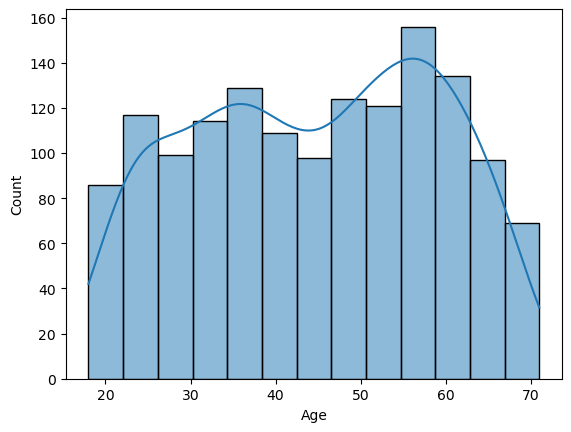

In [43]:
sns.histplot(data=data,x="Age",kde=True)

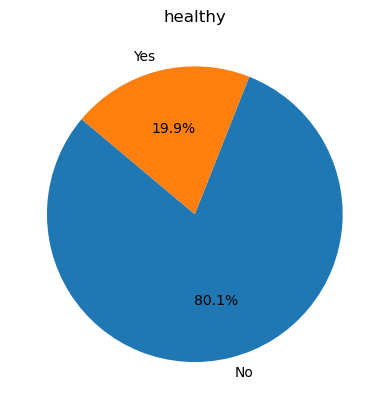

In [47]:
#Uni-variate Analysis
# my traget value is (y) is deposit (categorical method)
sizes= data['healthy'].value_counts()
labels=sizes.index
size=sizes.values
plt.pie(size,labels=labels,autopct="%1.1f%%",startangle=140)
plt.title("healthy")
plt.show()

<Axes: xlabel='VisitFrequency', ylabel='Count'>

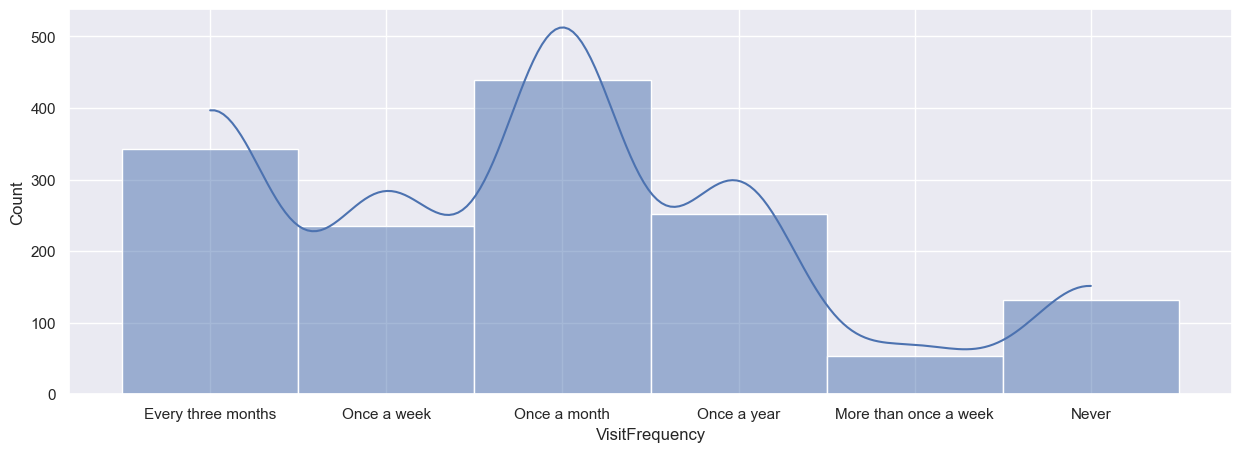

In [49]:
sns.set(rc={'figure.figsize':(15,5)}) #used to space between two bars
sns.histplot(data=data,bins=5000,x="VisitFrequency",kde=True)

<Axes: xlabel='Like', ylabel='Count'>

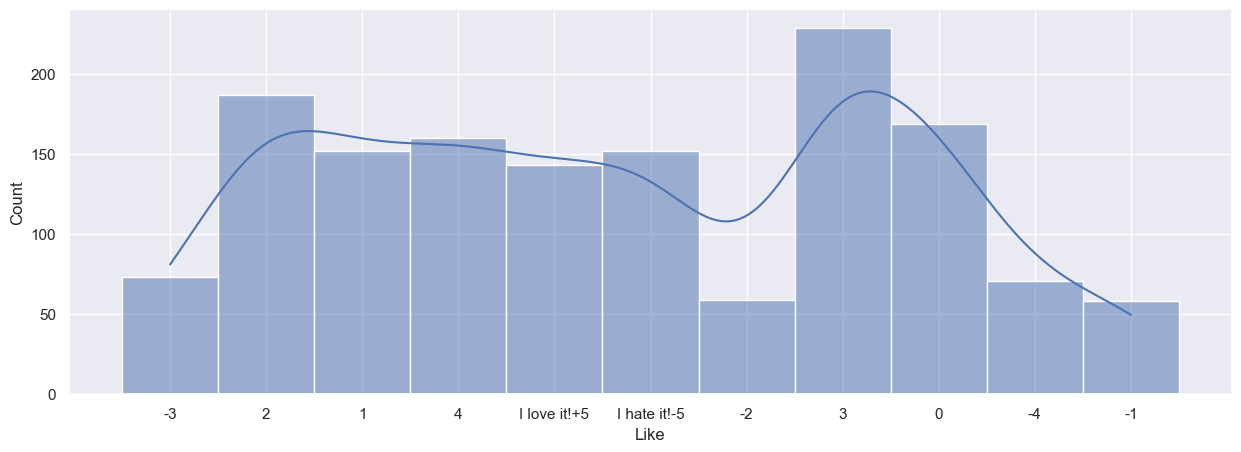

In [53]:
sns.histplot(data=data,x="Like",kde=True)

<Axes: xlabel='yummy', ylabel='Count'>

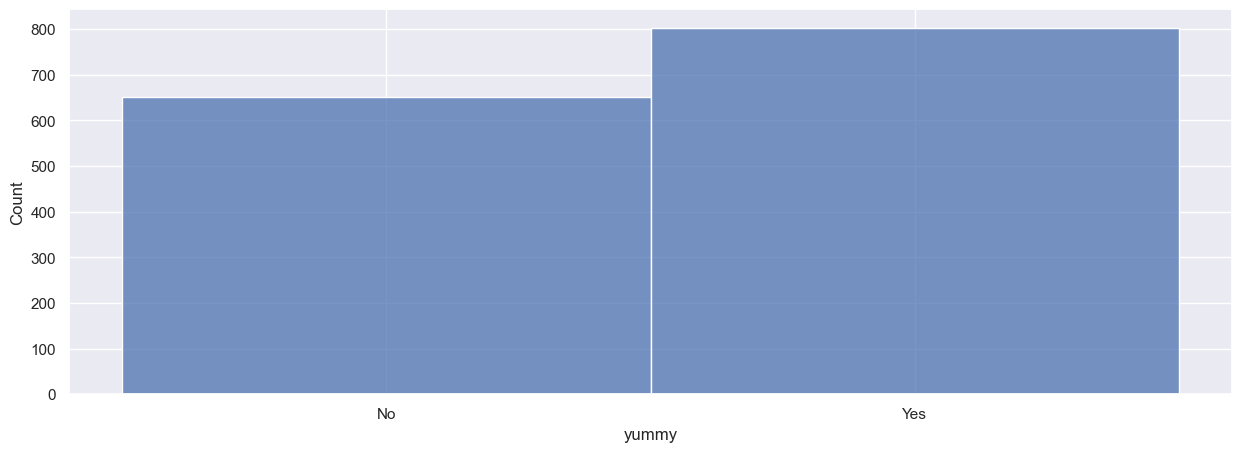

In [55]:
sns.histplot(data=data,x="yummy")

<Axes: xlabel='fattening', ylabel='Count'>

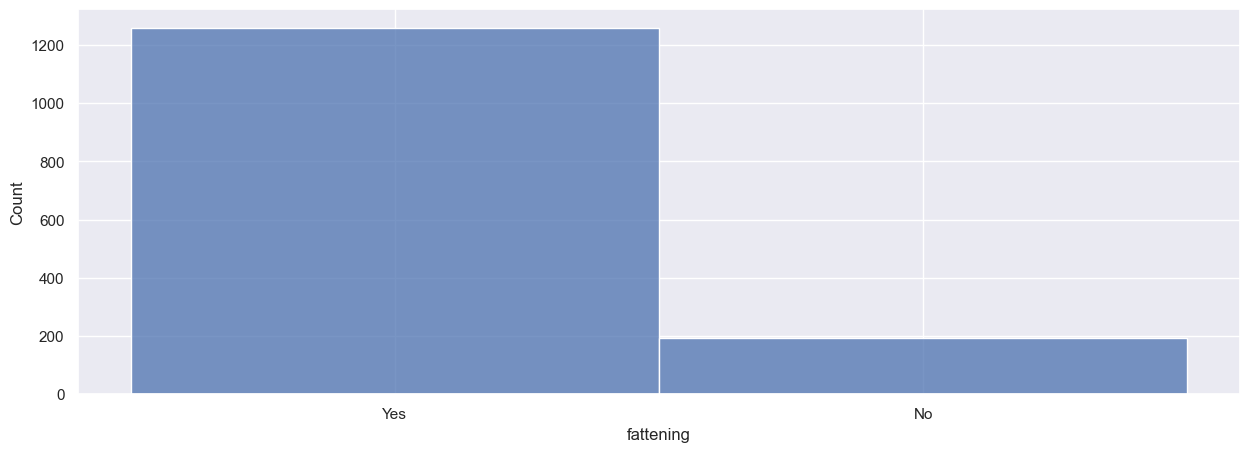

In [57]:
sns.histplot(data=data,x="fattening")

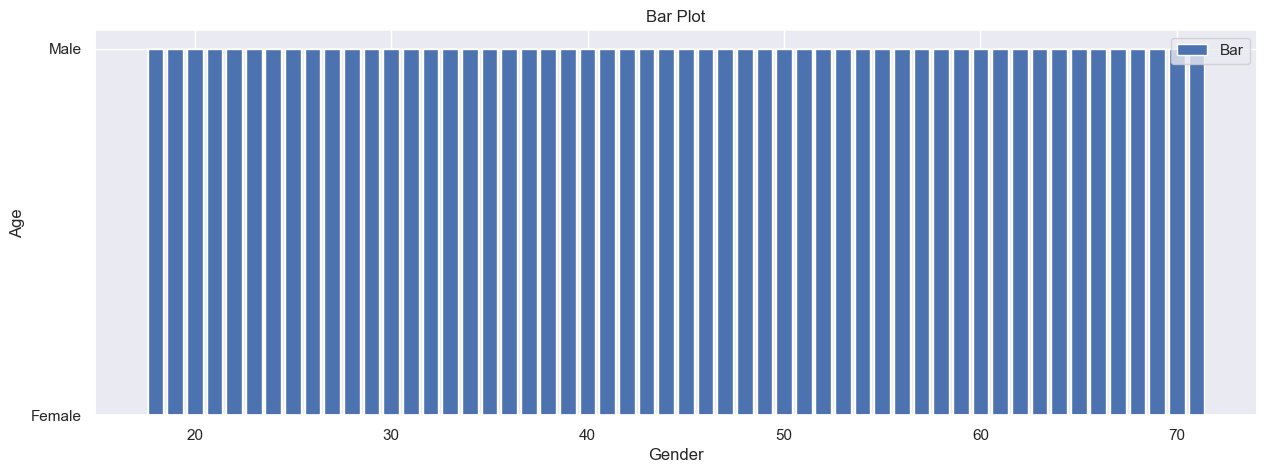

In [85]:
# bi variate analysis
y=data['Age']
x=data['Gender']
plt.bar(y,x, label='Bar') #RGB COlor and we can define
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Bar Plot')
plt.legend()


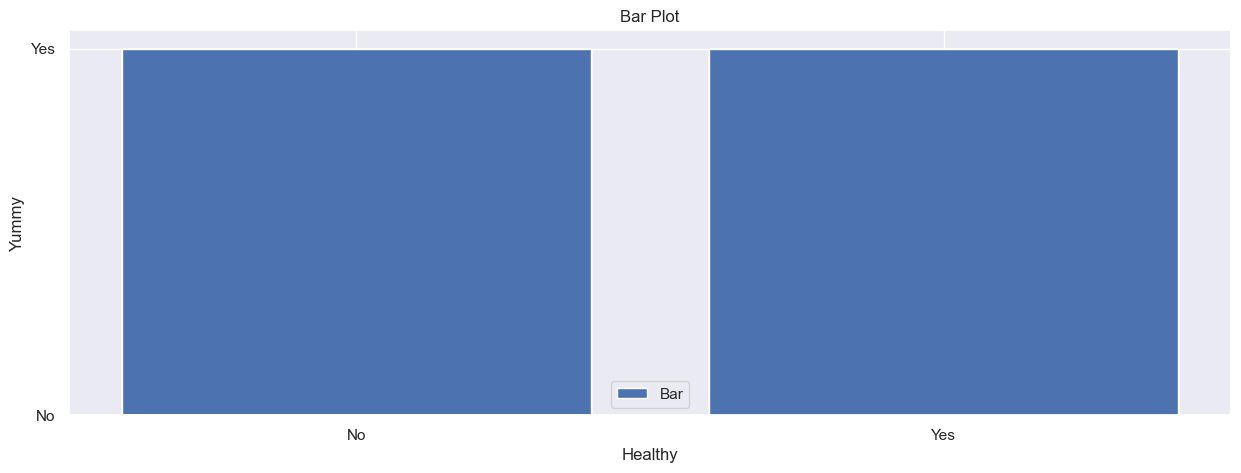

In [65]:
# bi variate analysis
y=data['yummy']
x=data['healthy']
plt.bar(y,x, label='Bar') #RGB COlor and we can define
plt.xlabel('Healthy')
plt.ylabel('Yummy')
plt.title('Bar Plot')
plt.legend()


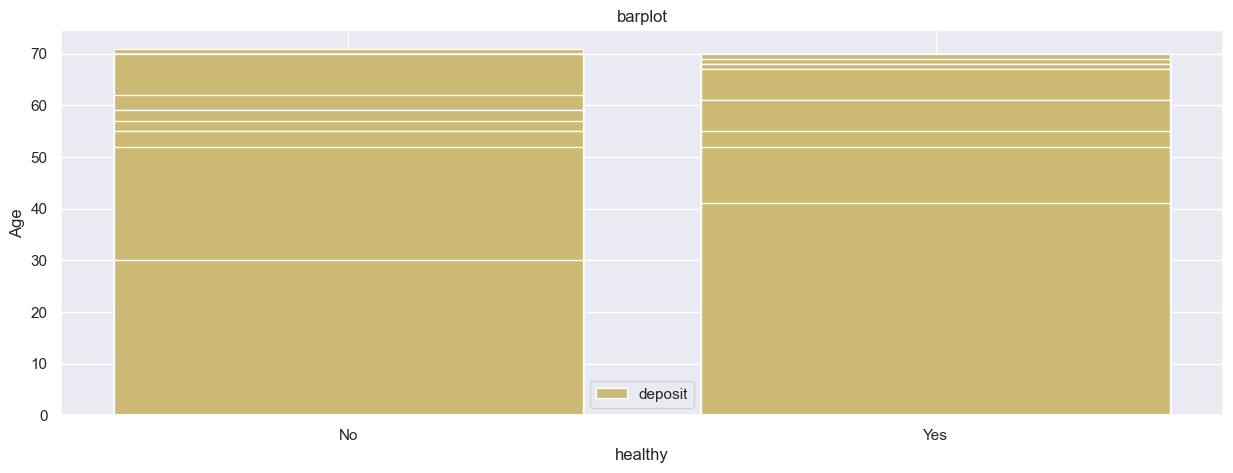

In [69]:
import matplotlib.pyplot as plt
x=data["healthy"]
y=data["Age"]
plt.bar(x, y, label="deposit",color="y")
plt.xlabel("healthy")
plt.ylabel("Age")
plt.title("barplot")
plt.legend()
plt.show()

<Axes: xlabel='spicy', ylabel='Age'>

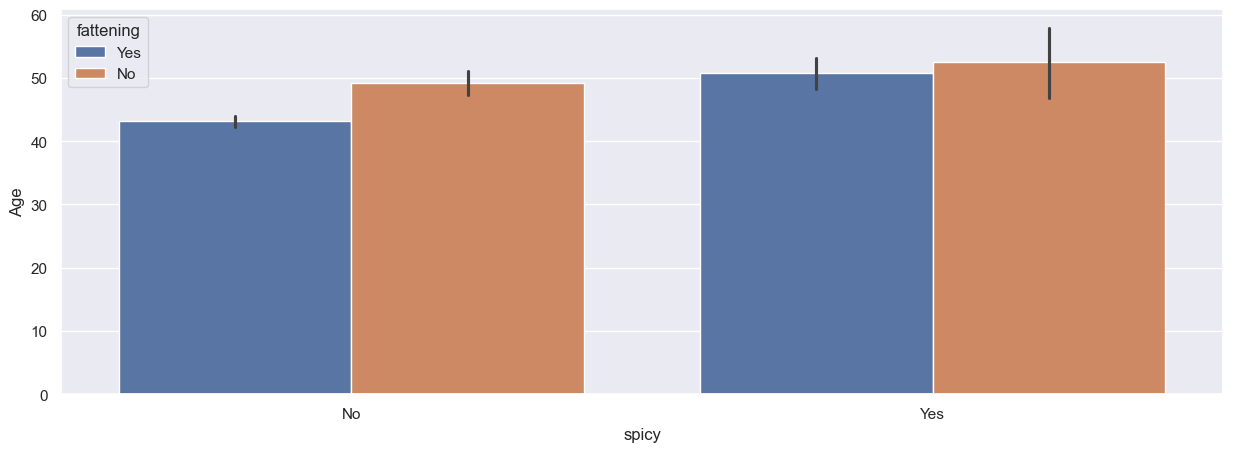

In [71]:
sns.barplot(x="spicy", y="Age", hue="fattening",data=data)

<Axes: xlabel='healthy', ylabel='Age'>

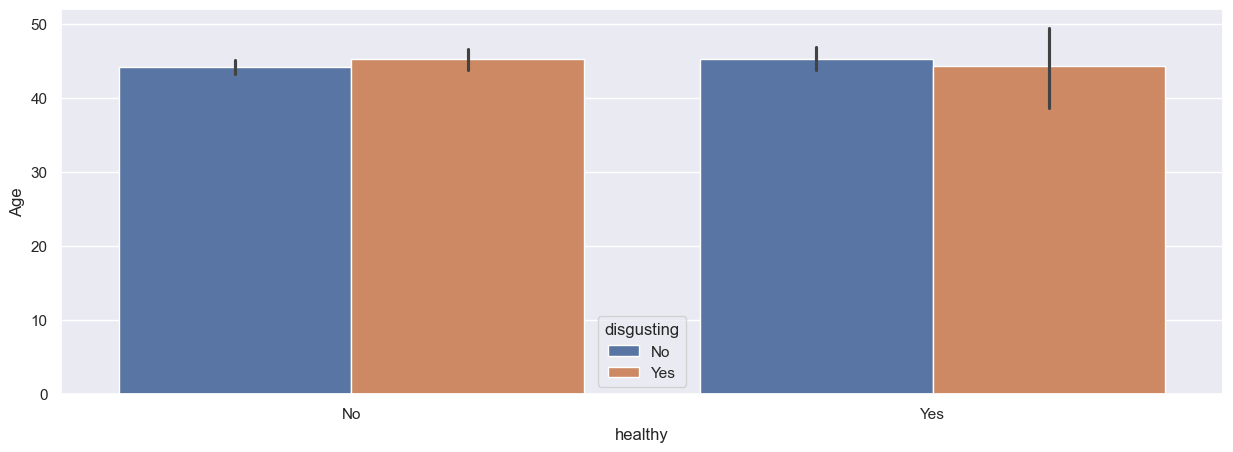

In [73]:
sns.barplot(x="healthy", y="Age", hue="disgusting",data=data)

<Axes: xlabel='Gender', ylabel='Like'>

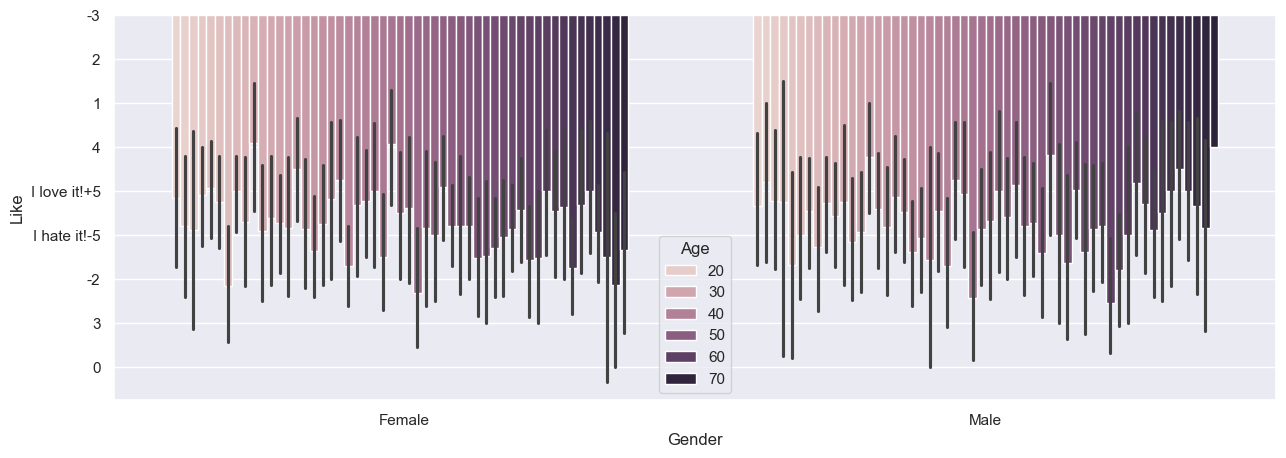

In [83]:
sns.barplot(x="Gender", y="Like", hue="Age",data=data)